In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
!git clone https://github.com/matterport/Mask_RCNN.git

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [4]:
%cd /content/drive/MyDrive/Mask_RCNN

/content/drive/MyDrive/Mask_RCNN


In [5]:
!git clone https://github.com/waleedka/coco

fatal: destination path 'coco' already exists and is not an empty directory.


In [6]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 29.9 MB/s 
     |████████████████████████████████| 298 kB 53.5 MB/s 
     |████████████████████████████████| 120 kB 49.6 MB/s 
     |████████████████████████████████| 154 kB 41.9 MB/s 
     |████████████████████████████████| 82 kB 464 kB/s 


In [7]:
# install tf,keras version

!pip install tensorflow==1.13.1
!pip install tensorflow-gpu==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 61 kB/s 
     |████████████████████████████████| 50 kB 3.2 MB/s 
     |████████████████████████████████| 367 kB 40.0 MB/s 
     |████████████████████████████████| 3.2 MB 34.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
ERROR: pip's dependency resolver does not currently tak

In [8]:
!python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [9]:
%cd /content/drive/MyDrive/Mask_RCNN/samples

/content/drive/MyDrive/Mask_RCNN/samples


In [10]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# 루트 디렉터리 경로 설정
ROOT_DIR = os.path.abspath("../")

import warnings
warnings.filterwarnings("ignore")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

#사전 훈련 된 가중치의 경로와 분할을 수행 할 이미지를 정의
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# 만들어진 가중치를 가져오기
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_apple_0029.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")


#샘플 폴더에 가중치를 배치하지 않은 경우 가중치가 다시 다운로드된다.
#Mask R-CNN 모델을 추론하는 데 사용할 추론 클래스를 생성한다.
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

Using TensorFlow backend.



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

# 매우 중요

* coco 클래스는 1+80으로 sample/coco 에 들어가면 coco.py에서 
```
# Number of classes (including background)
NUM_CLASSES = 1 + 80 # COCO has 80 classes
```
* 이부분을 1+1로 바꿔주시고
* 밑에 class_names = ['BG', 'apple']로 바꾸신 다음 
* mask_rcnn_coco.h5를 제가 올려놓은 선학습 가중치 파일명으로 바꾸신 다음 돌리시면 됩니다.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


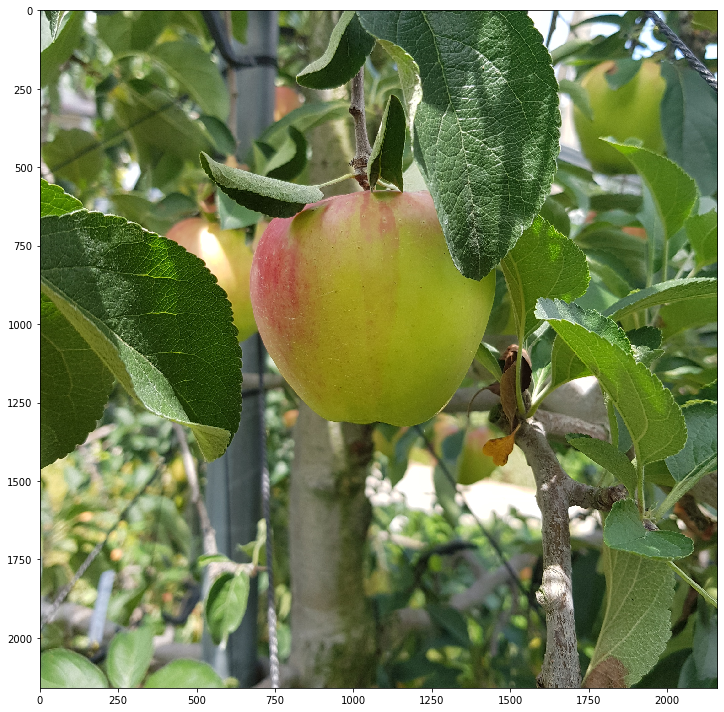

In [11]:
# 모델 생성
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# 저장된 가중치 불러오기
model.load_weights('mask_rcnn_apple_0029.h5', by_name=True)


#이제 예측 단계에서 도움이 될 COCO 데이터 세트의 클래스를 정의
class_names = ['BG', 'apple']
               
               
               
# 이미지를로드하고 모델이 어떻게 작동하는지 살펴 보자

image = skimage.io.imread('20210816_RGB_09.2_F04_HR_13_015_04_0_A.jpg')

# 기존 이미지 불러오기
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

Processing 1 images
image                    shape: (2160, 2160, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2160.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


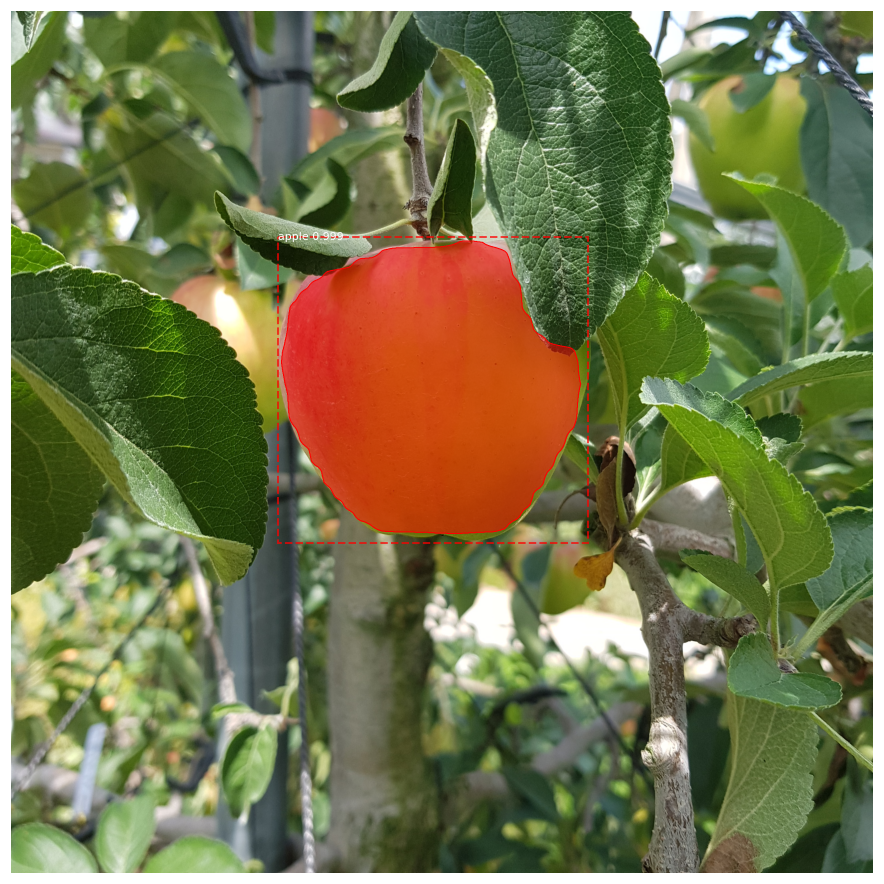

In [12]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [13]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(2160, 2160, 1)

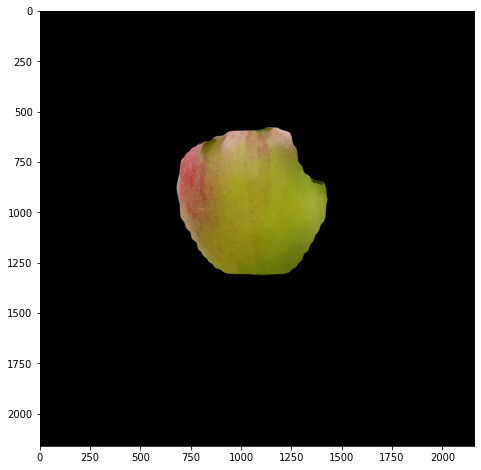

In [15]:
for i in range(mask.shape[2]):
    temp = skimage.io.imread('20210816_RGB_09.2_F04_HR_13_015_04_0_A.jpg')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp)
    plt.savefig(f'./ap1.jpg', dpi=300)